In [9]:
from tensorflow import keras
from keras.datasets import reuters
reuters = keras.datasets.reuters
(X_train_full,y_train_full), (X_test_full,y_test_full) = reuters.load_data(num_words=10000)

In [10]:
X_train_full

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [11]:
y_train_full

array([ 3,  4,  3, ..., 25,  3, 25])

In [12]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3,'?')for i in X_train_full[0]])

In [13]:
reverse_word_index[1]
decode_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

X_train = vectorize_sequences(X_train_full)
X_test = vectorize_sequences(X_test_full)

In [16]:
print(X_train_full.shape)
print(X_train.shape)

(8982,)
(8982, 10000)


In [17]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [18]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

y_train = to_one_hot(y_train_full)
y_test = to_one_hot(y_test_full)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
y_train.shape

(8982, 46)

In [21]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y_test.shape

(2246, 46)

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(10000,)))
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(46,activation="softmax"))

In [28]:
model.compile(loss="categorical_crossentropy",optimizer = "sgd",metrics="accuracy")

In [29]:
X_val = X_train[:1000]
X_train_part = X_train[1000:]
y_val = y_train[:1000]
y_train_part = y_train[1000:]

In [30]:
history = model.fit(X_train_part, y_train_part,epochs = 30,validation_data = (X_val,y_val))

Epoch 1/30
250/250 [==============================] - 4s 9ms/step - loss: 2.7248 - accuracy: 0.4439 - val_loss: 2.0056 - val_accuracy: 0.5270
Epoch 2/30
250/250 [==============================] - 2s 8ms/step - loss: 1.8556 - accuracy: 0.5416 - val_loss: 1.7217 - val_accuracy: 0.5690
Epoch 3/30
250/250 [==============================] - 2s 8ms/step - loss: 1.6508 - accuracy: 0.6025 - val_loss: 1.5906 - val_accuracy: 0.6390
Epoch 4/30
250/250 [==============================] - 2s 7ms/step - loss: 1.5241 - accuracy: 0.6555 - val_loss: 1.4981 - val_accuracy: 0.6740
Epoch 5/30
250/250 [==============================] - 2s 7ms/step - loss: 1.4183 - accuracy: 0.6865 - val_loss: 1.4068 - val_accuracy: 0.6740
Epoch 6/30
250/250 [==============================] - 2s 8ms/step - loss: 1.3244 - accuracy: 0.6988 - val_loss: 1.3362 - val_accuracy: 0.6950
Epoch 7/30
250/250 [==============================] - 2s 8ms/step - loss: 1.2432 - accuracy: 0.7139 - val_loss: 1.2725 - val_accuracy: 0.7050
Epoch 

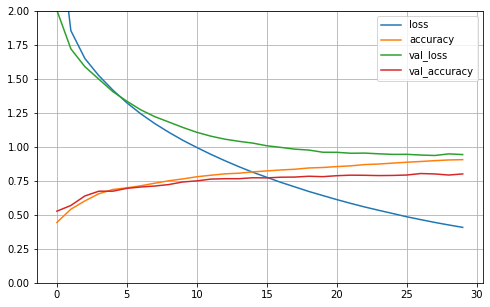

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.savefig("annapp_reuters_train_epoch_30")
plt.show()